<img style="float: left;" src="images/unige_csd.png" alt="drawing" width="200"/>

# <center>Imagerie Numérique 2023 Automne</center>

<center>September 28, 2023</center>

# <center><ins>TP Class N°1 - Basics</ins></center>

#### *Instructions :*  

* This TP should be completed and uploaded on Moodle before **Thursday 12 October 2023, 23h59**.
* The name of the file you upload should be **TP1_name_surname.ipynb**.
* If you need to include attached files to you TP (images, python files, ...), please archive them together in a **ZIP** folder named **TP1_name_surname.zip**.

## Exercise 1 : Color Channels
*(1 point)*

Read the image *colors.jpg*.  

### (a) Display the original image using *matplotlib*.

Listing images present in images folder for easier access:

In [1]:
import os
os.listdir("images")

['logo_cui.jpg',
 'lena.png',
 'color_grad.png',
 'grad.png',
 'black_and_white.png',
 'unige_csd.png',
 'colors.jpg']

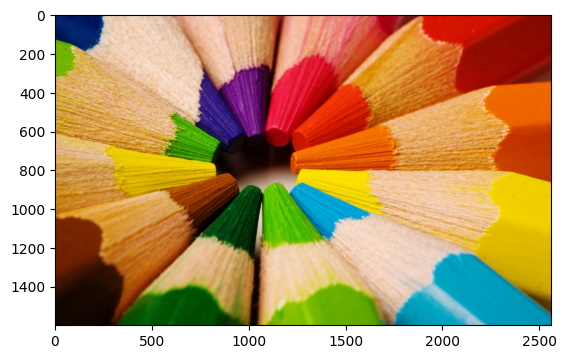

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import shape, uint8 as u8, uint32 as u32, float64 as f64
from numpy.typing import NDArray
from matplotlib.image import imread
from copy import deepcopy

# Matplotlib use PIL to render images
from PIL import Image

#colors_jpg = Image.open("images/colors.jpg").convert('L')
colors_jpg_gs = Image.open("images/colors.jpg").convert('L')
colors_jpg = np.array(imread("images/colors.jpg"), dtype=u8)
colors_orig = deepcopy(colors_jpg)

plt.imshow(colors_jpg)

### (b) On a 1x3 subplot, display the three color components separately using correctly chosen colormaps.  
(That is, 'Reds_r' for red, 'Greens_r' for green and 'Blues_r' for blue)

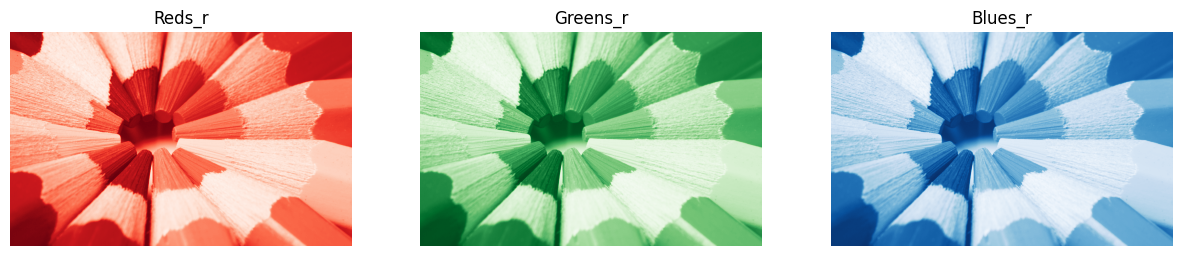

In [3]:
# for each col take 1st col of that col => red, 2nd col of that col => green, 3rd col of that col => blue
#reds = np.array([colors_jpg[i][:, 0] for i in range(len(colors_jpg))])
#greens = np.array([colors_jpg[i][:, 1] for i in range(len(colors_jpg))])
#blues = np.array([colors_jpg[i][:, 2] for i in range(len(colors_jpg))])

im = plt.subplots(1, 3, figsize=(15, 5))
def image_plot(idx: int, cmap: str):
    plt.subplot(1, 3, idx)
    plt.title(cmap)
    plt.imshow(colors_jpg_gs, cmap=cmap)
    plt.axis("off")

image_plot(1, "Reds_r")
image_plot(2, "Greens_r")
image_plot(3, "Blues_r")
plt.show()


### (c) On 1x3 subplot, display three images:


1. fill original image's first channel with zeros

2. fill original image's second channel with zeros

3. fill original image's third channel with zeros

Explain the results

NB: La version en "1x3 subplot" est juste en dessous des 3 images. (juste avant le point d)

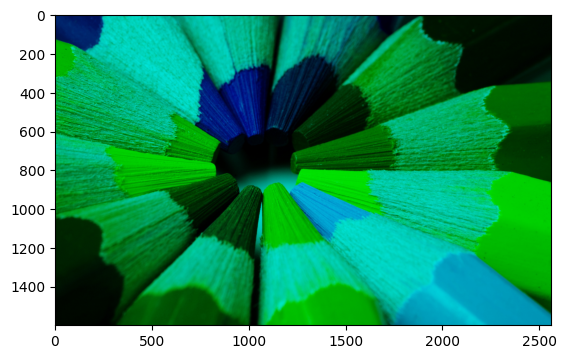

In [4]:
# load original image

orig1 = deepcopy(colors_orig)
orig2 = deepcopy(colors_orig)
orig3 = deepcopy(colors_orig)


# fill 1st chanel with 0
orig1[:,:,0] = 0
plt.imshow(orig1)

On voit bien que l'image paraît plus bleutée et plus verte, après avoir enlevé toute la composante rouge.
Avec tendance plus forte pour le vert.

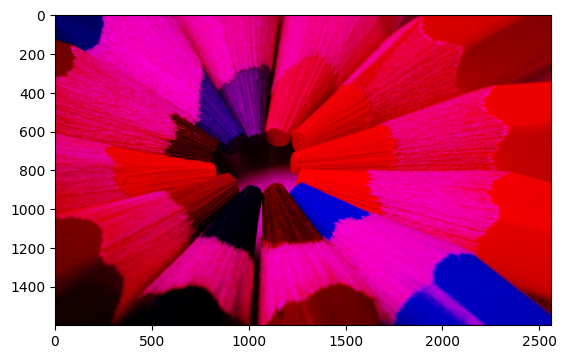

In [5]:
# fill 2nd chanel with 0s. i.e. remove all green
orig2[:,:,1] = 0
plt.imshow(orig2)

Comme l'image d'avant paraissait avoir plus de vert que de bleu (après avoir enlevé le rouge).
Cette fois quand on enlève le vert, on a l'impression qu'il y a beaucoup plus de rouge que de bleu.
On pourrait donc penser que l'image contient significativement plus de vert et de rouge que de bleu.

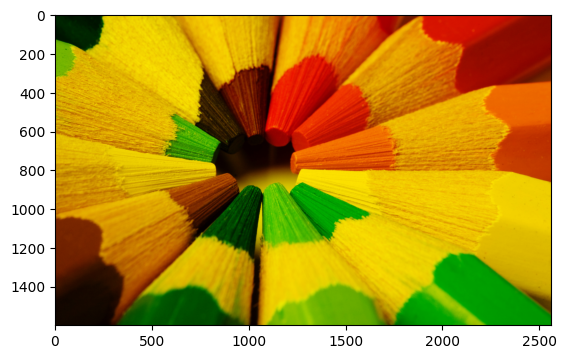

In [6]:
# fill 3nd chanel with 0s. i.e. remove all blue
orig3[:,:,2] = 0
plt.imshow(orig3)

L'image paraît presque jaune et ressemble beaucoup plus à l'image originale que les 2 autres ont en conclut donc que notre
théorie sur la proéminence du rouge et du vert par rapport au bleu est verifiée (ou du moins cohérente.)

**Version avec les 3 images sur le même subplot**

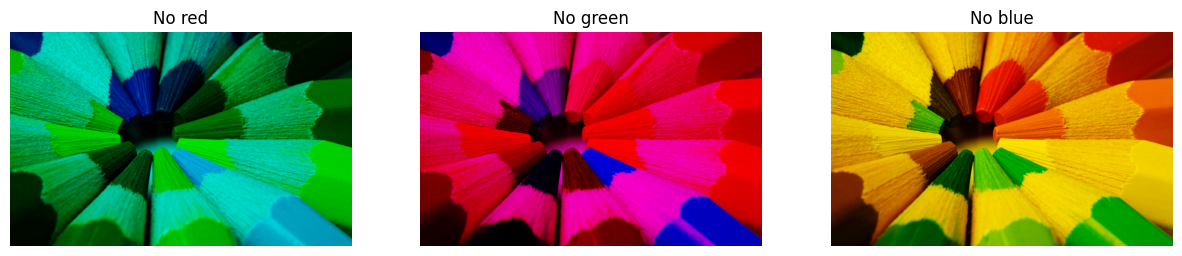

In [7]:

im = plt.subplots(1, 3, figsize=(15, 5))
def image_plot(idx: int, data, title=None):
    plt.subplot(1, 3, idx)
    plt.title(title)
    plt.imshow(data)
    plt.axis("off")

image_plot(1, orig1, "No red")
image_plot(2, orig2, "No green")
image_plot(3, orig3, "No blue")
plt.show()

***

### (d) To transform an RGB image to grayscale, you need to take a weighted average of the different color channels :

$$grayscale = 0.2989 \times R + 0.5870 \times G + 0.1140 \times B$$

where, R,G,B are the red blue and green channels extracted (sliced) from the image.

1. Implement this operation using *Numpy* @ operator between the original image and the weight vector

$$w = [0.2125, 0.7154, 0.0721]$$

2. Obtain the same result by using the function *skimage.color.rgb2gray()*. Display it.

3. Compute singlechannel image by performing simple averaging of the color channels. Display it.

4. Compare the images, that you have obtained. Explain the differences and similarities in results.

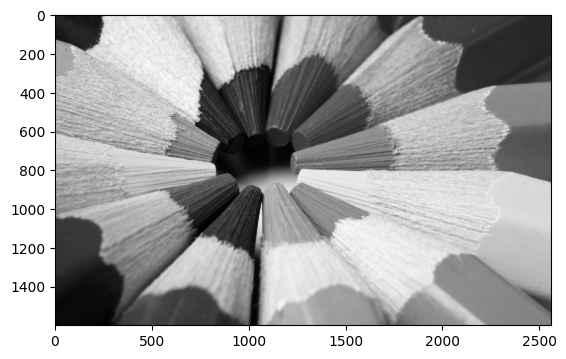

In [8]:
# make sure to usavoid modifying original variable. ande the same type  (double precision floats) for next operation
orig: NDArray[f64] = np.array(imread("images/colors.jpg"), dtype=f64)
w: NDArray[f64] = np.array([0.2125, 0.7154, 0.0721], dtype=f64)

grayscale1 = orig @ w
# Image is now (m, n) instead of (m,n, 3) => we can/need to use cmap!

plt.imshow(grayscale1, cmap='gray') # infers dict of colors when matrix is 2D array
plt.show()

<div class="comment" style="display: none"> It looks like we almost just removed the red coordinates, its still far from actual grayscale.
(I've tried doing `orig[:,:] @= w ` and `orig[:,] @ w` to multiply each element / row, but i got an error about the matrix dimensions).
</div>

2. __Obtain the same result by using the function *skimage.color.rgb2gray()*. Display it.__


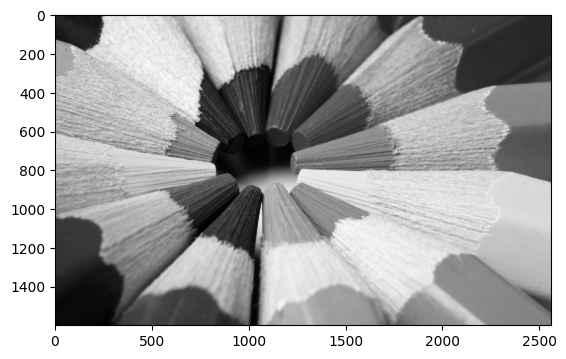

In [9]:
import skimage as sk
from skimage.color import rgb2gray

orig = deepcopy(colors_orig)
grayscale2 = rgb2gray(orig)

plt.imshow(grayscale2, cmap="gray")
plt.show()

We do obtain the same result.

3. **Compute singlechannel image by performing simple averaging of the color channels. Display it.**

*Single channel* seems to refer to the process of replacing each pixel by the average of its rgb component

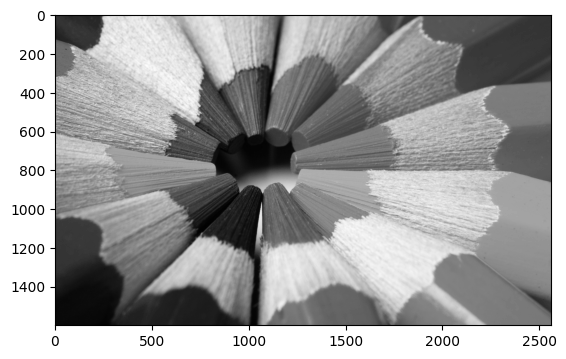

In [10]:
orig = deepcopy(colors_orig)
grayscale3 = orig.mean(-1)
plt.imshow(grayscale3, cmap="gray")
plt.show()

We, indeed, get the grayscaled version of the image.


4. **Compare the images, that you have obtained. Explain the differences and similarities in results.**

Lets plot them next to each other to see the differences, because for now the look identical.



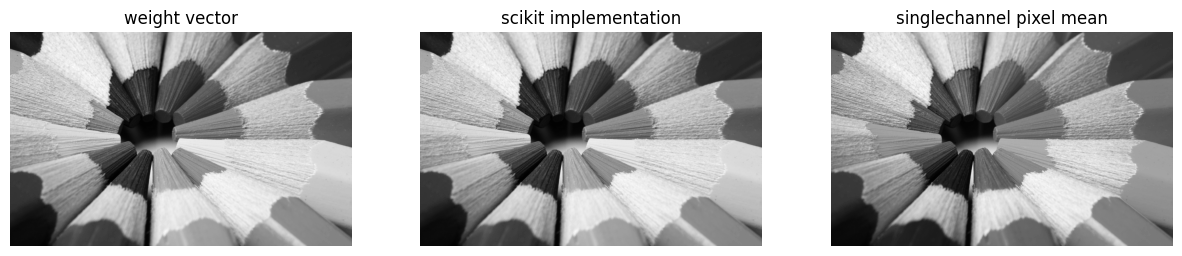

In [11]:
im = plt.subplots(1, 3, figsize=(15, 5))
def image_plot(idx: int, data, title=None):
    plt.subplot(1, 3, idx)
    plt.title(title)
    plt.imshow(data, cmap="gray")
    plt.axis("off")

image_plot(1, grayscale1, "weight vector")
image_plot(2, grayscale2, "scikit implementation")
image_plot(3, grayscale3, "singlechannel pixel mean")
plt.show()

The first 2 seem identical, but the lasat one seem lighter on the top side of the image and darker on the bottom side.
i.e. brighter lights and darker darks.

***

### (e) On a 1x3 subplot, display the three histograms of the three color components separately (you may want to use the function plt.hist())

Since the grayscale versions don't have color (rgb) / components anymore (they are ***2***D arrays).  
The only color component we can plot are the one from the original image.  
Which is what we do here.

708312819
531843665
294109795


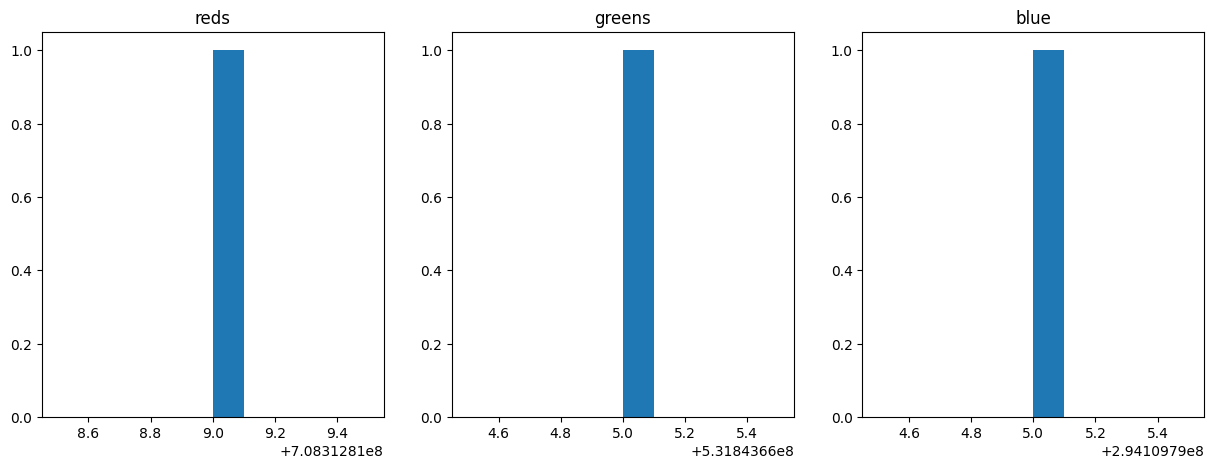

In [12]:
im = plt.subplots(1, 3, figsize=(15, 5))
def image_hist(idx: int, data, title=None):
    plt.subplot(1, 3, idx)
    plt.title(title)
    plt.hist(data)
    #plt.imshow(data, cmap="gray")
    #plt.axis("off")

# ! no more rgb component since were in grayscale => 3 colors components of what?
# ! => assuming we talk about the original image
reds_1 = colors_orig[:,:,0].sum()
greens_1 = colors_orig[:,:,1].sum()
blues_1 = colors_orig[:,:,2].sum()

print(reds_1)
print(greens_1)
print(blues_1)
image_hist(1, reds_1, "reds")
image_hist(2, greens_1, "greens")
image_hist(3, blues_1, "blue")
#image_hist(1, grayscale1)
#image_hist(2, grayscale2)
#image_hist(3, grayscale3)
#plt.show()

I also tried plotting the grayscale first but running the code took more than 30s. So I highly doubt that this was what we had to do.
Nevertheless the code is available below.

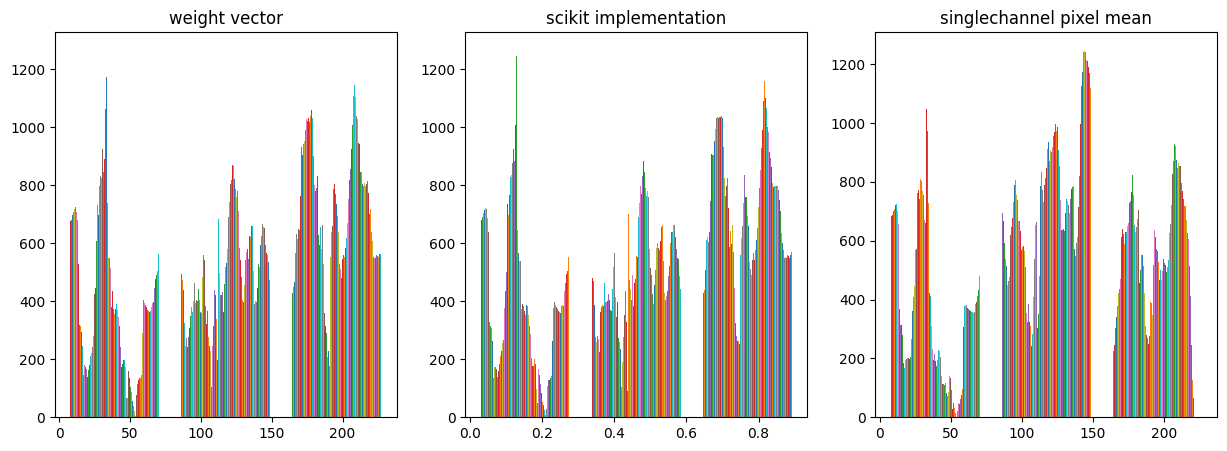

In [13]:
im = plt.subplots(1, 3, figsize=(15, 5))
def image_hist(idx: int, data, title=None):
    plt.subplot(1, 3, idx)
    plt.title(title)
    plt.hist(data, bins=3)

image_hist(1, grayscale1, "weight vector")
image_hist(2, grayscale2, "scikit implementation")
image_hist(3, grayscale3, "singlechannel pixel mean")
plt.show()

## Exercise 2 : Numpy matrices

*(1 point)*

### (a) Using *Numpy*, generate a gradient image like the one represented below :

<img src="images/grad.png" alt="drawing" width="400"/>

* Its shape should be $[125, 500]$
* Its dynamic range should be 0 to 255 encoded in a UINT8 array

and display it using *matplotlib*.

In [14]:
# restarting kernel here
import matplotlib.pyplot as plt
import numpy as np
from numpy import shape, uint8 as u8, uint32 as u32, float64 as f64
from numpy.typing import NDArray
from matplotlib.image import imread
from copy import deepcopy
import skimage as sk

def imshow_gray(data, show=True):
  plt.imshow(data, cmap="gray")
  if (show): plt.show()


def imshow(data, show=True):
  plt.imshow(data)
  if (show): plt.show()

[[  0   1   2 ... 252 253 254]
 [  0   0   0 ... 253 254 254]
 [  1   2   2 ... 253 254 254]
 ...
 [  0   1   1 ... 251 252 254]
 [  0   0   0 ... 253 254 254]
 [  0   0   0 ... 252 254 254]]


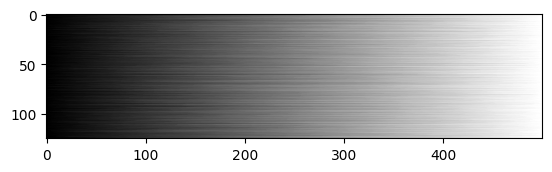

In [15]:
gray_dient = np.random.randint(low=0, high=255, size=(125, 500), dtype=u8)
gray_dient.sort(1)
print(gray_dient)
imshow_gray(gray_dient)

I generated a matrix of integer of shape (125, 500). Then just sorting it, orders the bit in a gradient (bit-increasing) manner.


### (b) Generate the images that are represented below using Numpy arrays of shape [2,2] and dtype boolean. Visualize the results on a $1 \times 3$ grid.

<img src="images/black_and_white.png" alt="drawing" width="800"/>

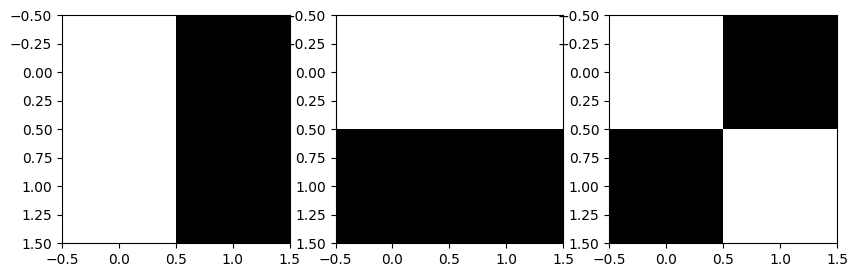

In [16]:
dall = np.random.randint(low=0, high=2, size=(2, 2), dtype=bool)
dall1 = np.array([
    [True, False],
    [True, False]
    ])

dall2 = np.array([
    [True, True],
    [False, False]
    ])

dall3 = np.array([
    [True, False],
    [False, True]
    ])

im = plt.subplots(1, 3, figsize=(10, 5))
def image_plot(idx: int, data, title=None):
    plt.subplot(1, 3, idx)
    plt.title(title)
    #plt.axis("off")
    imshow_gray(data, show=False)

image_plot(1, dall1)
image_plot(2, dall2)
image_plot(3, dall3)
plt.show()

### (c) Find a way to write the third array as a combination of the first two using *numpy* operators (addition, multiplication, *np.bitwise_and()*, *np.bitwise_not(), ...*)

Looking more closely we see that 3 is just an "if and only if" of the first 2. I.e. $1 \leftrightarrow 2$.  
I.e. dall3 = dall1 XNOR dall2.

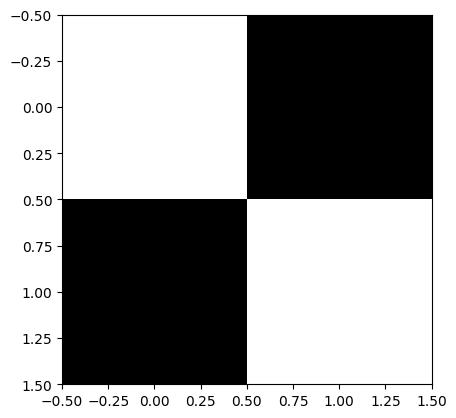

In [17]:
dall4 = np.invert(np.bitwise_xor(dall1, dall2))
imshow_gray(dall4)

### (d) By correctly using color channels, only manipulating the gradient image you produced in (a), and the functions

* *np.stack()*
* *np.zeros_like()*

Produce the following image :

<img src="images/color_grad.png" alt="drawing" width="400"/>

What we want: (ideally):  
i.e. what we have to emulate with stack and zeros_like :

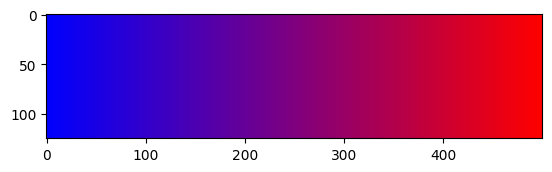

In [18]:
red = np.array(np.linspace(0, 255, num=500, dtype=u8), dtype=u8)
blue = np.flip(red)
grad = np.zeros((125, len(red), 3), dtype=u8)

for i in range(len(grad)):
  for j in range(len(grad[i])):
    grad[i,j] = np.array([red[j], 0, blue[j]])

imshow(grad)

How do we get it:  
We want pixel with blue starting from 255 to 0
and red from 0 to 255.  
Like so:  
[0,0,255], [1,0,254], ... [255,0,0]

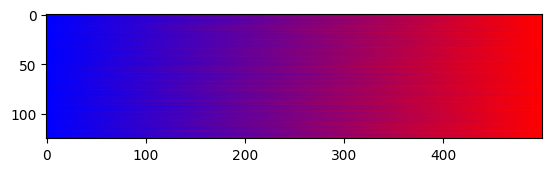

In [19]:
# using grad_colult from a)
gd = deepcopy(gray_dient)
gd2 = deepcopy(gd)
gd3 = deepcopy(gd)
gd[0] # goal duplicate that for 3 coord reverse for red and  set to 0 for green

grad_col = np.stack([gd, gd2, gd3], -1) # full "gradient"
red = grad_col[:,:,0][0] # getting (sorted increasing) and uniformely distributed in [0, 255]
# i.e. hopefully [0,1, ..., 255]
blue = red[::-1] # getting the same as above but decreasing

grad_col[:,:,2] = 255 - grad_col[:,:,2]
grad_col[:,:,1] = 0

imshow(grad_col)

---

## Exercise 3 : Numpy operators
*(1 point)*

### (a) Read the image *lena.png* and display it. What is its dtype ? its dynamic range ? How many color channels does it have ?

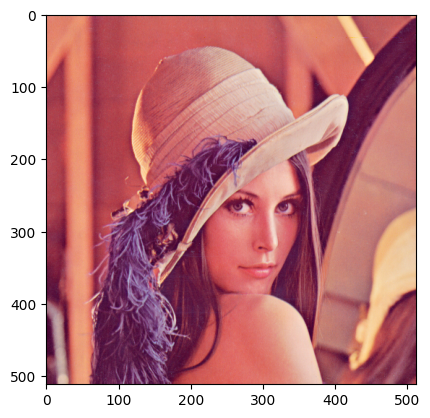

float32 
-----
Dynamic range [0.0117647061124444, 1.0]
3


In [43]:
lena_orig = np.array(imread("images/lena.png"))

lena = deepcopy(lena_orig)
imshow(lena)


print(lena.dtype, "\n-----")

print(f"Dynamic range [{np.min(lena)}, {np.max(lena)}]")

print(lena.shape[2]) # Dimension of tensor => number of color channel (should be 3)


As we can see its  
- dtpye is `uint8`.
- dynamic range is [0, 255]
- it has 3 color channels


### (b) Compute the MSE (L2 distance) between the two grayscale images (any two grayscale images from Ex. 1.d) by using *np.linalg.norm()*. Comment on the value.

In [38]:
from numpy.linalg import norm
gs1, gs2 = deepcopy(grayscale2), deepcopy(grayscale3)


mse = (norm(gs1-gs2)**2) / (len(gs1) * len(gs1[0]))
mse


18714.849212059355

Let `m_1 = len(gs1), n_1 = len(gs1[0])  and   m_2 = len(gs2),   n_2 = len(gs2[0])`.  

We can see that whether we divide by the `m1 * n1` or by `m2*n2` we get the same result.

We can also note that result is pretty significant.

### (c) On the grayscale image, crop the face of Lena using a rectangle with coordinates :

* Top-left (150, 100)
* Down-right (375, 380)

By using *Numpy* array slicing

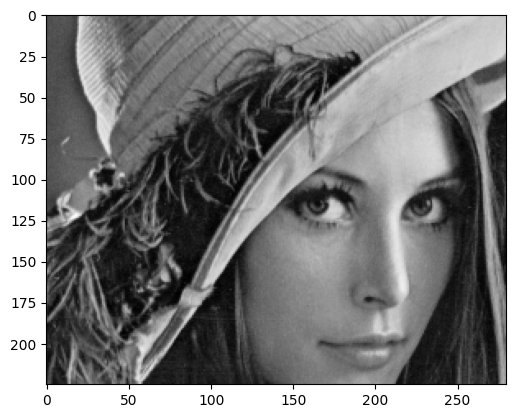

In [48]:
lena_gs = rgb2gray(lena_orig)

imshow_gray(lena_gs[150:375, 100:380])

(d) Normalize the RGB _lena.png_ image. First convert image to _np.float32_ and scale to _[0, 1]_ dynamic range, then substract _0.5_ from each color channel and divide each channel by _0.5_. Use Numpy scalar on matrix operations.

## Exercise 4 : Gaussian noise
*(1 point)*

Read the image *lena.png* and convert it to grayscale. Ensure that it has dtype _np.float32_ with dynamic range _[0, 1]_.

### (a) Define a *Numpy* array of same shape as the image, with each entry randomly sampled from a Gaussian distribution $\mathcal{N}(0, \sigma^2)$ with $\sigma = 0.01, 0.3, 0.5$.

Hint : Use *np.random.randn()* function

### (b) Add this noise to the grayscale image using numpy array addition and visualise the results on a 1x3 subplot.

### (c) Redo the preceding step using the function *skimage.util.random_noise()* with parameter *clip=True*.

### (d) Explain why, for the same $\sigma$, the two methods yield different visual results.

--- Write your answer here ---

---

## Exercise 5 : Salt & Pepper Noise

*(1 point)*

Read the image *lena.png* and convert it to grayscale. Make sure that it has dtype float with dynamic range [0,1].

### (a) Using *skimage.util.random_noise()* add the Salt & Pepper noise with density

$$\rho = 0.01, 0.1, 0.5$$

and display the results.

### (b) Explain the differences between the Gaussian noise and the S&P noise. Which one do you think is harder to remove ? Why ?

--- Write your answer here ---

(c) Write your own function that adds salt and pepper noise to the image. As inputs the function should take: input image - np.ndarray, p - percentage of the pixels to be replaced with noise. Make sure that your function works with singlechannel and multichannel images

In [21]:
import numpy as np
def add_salt_and_pepper(im_input: np.ndarray, p: float) -> np.ndarray:
    pass

---

### Exercise 6 : Mean and variance

*(1 point)*

Read the image *lena.png* and convert it to grayscale. Make sure that it has dtype _np.float32_ with dynamic range _[0, 1]_.

(a) Compute the global mean and the global variance of the image using *np.mean()* and *np.std()*

Read the image *lena.png* as RGB image. Make sure that it has dtype _np.float32_ with dynamic range _[0, 1]_.

(b) Compute the global mean and the global variance of each image channel using *np.mean()* and *np.std()*.

_Hint_: use _axis_ parameter in _np.mean()_ and _np.std()_ functions

(c) Compute the local mean and variance of the image for a window size $5 \times 5$ with splitting
steps 1 and 3. Display the obtained results as new (smaller) images. Explain the change
in the image size and give an interpretation of the results, from an image processing point
of view.

*Hint :* You may use the function *view_as_windows()* from *skimage.util.shape* package.

*Note :* do not use cycle, use Numpy array operations

---